## Analyze a 16 channel wav file recorded with the UMA16v2
R.Sprik 6/6/2024

In [ ]:
### chooseaworking matplotlib environment
#%matplotlib widget   # seems towork on RPi5 
#%matplotlib inline
%matplotlib qt5      

import matplotlib.pyplot as plt
import numpy as np

### Get inputfile

In [5]:
import numpy as np
import scipy.io.wavfile as wv

filename = 'testdt.wav'
[Fs, arec] = wv.read(filename)
[npts,nchan] = np.shape(arec)
dur = npts/Fs

print(f"{filename}")
print(f"npts = {npts}, nchan = {nchan}")
print(f"Fs   = {Fs}")
print(f"dur = {dur} s")

testdt.wav
npts = 131072, nchan = 16
Fs   = 48000
dur = 2.7306666666666666 s


#### Plot overview

In [6]:
plt.close("all")

plt.figure(10)
off = 0.02
for irec in range(nchan):
    plt.plot(arec[:,irec]+irec*off, '-')
plt.title(" dur = %5.2f s, fs = %5.0f S/s"%(dur, Fs))
plt.show()

### Power spectrum of selection

In [8]:
#import numpy as np
from scipy import signal
#import matplotlib.pyplot as plt
rng = np.random.default_rng()

plt.close(20)
plt.figure(20)

# choose channel and point selection
ibeg = 70000; iend = ibeg + 15000
arecs = arec[ibeg:iend, :]
ichan = 1
plt.subplot(2,1,1)
plt.plot(arecs[:,ichan], 'b-')
plt.title(f"{filename}: chan {ichan}")

plt.subplot(2,1,2)
f, Pxx_den = signal.periodogram(arecs[:,ichan], Fs)
plt.semilogy(f, Pxx_den)
#plt.ylim([1e-7, 1e2])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
#plt.title(f"{filename}: chan {ichan}")
plt.show()

### Test correlation shift

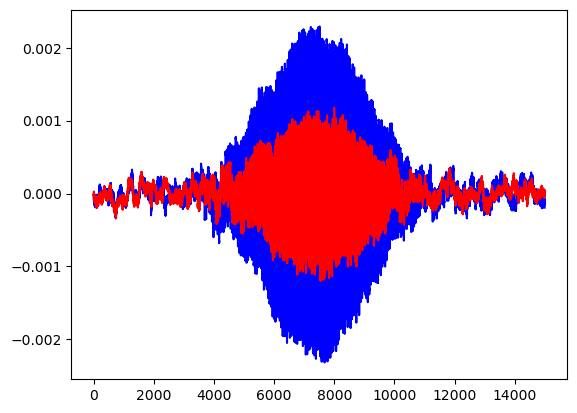

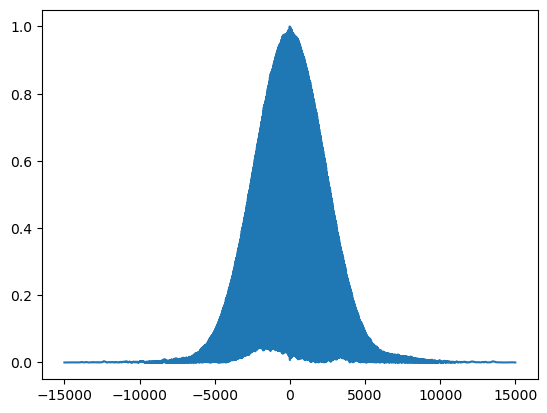

In [5]:
# select channels to compare 
ich1 = 0
ich2 = 6
s1 = arecs[:,ich1]
s2 = arecs[:,ich2]

#plot selection
plt.close(30)
plt.figure(30)
plt.plot(s1, 'b-')
plt.plot(s2, 'r-')
plt.show()

corr = signal.correlate(s1, s2)
corr /= np.max(corr)
lags = signal.correlation_lags(len(s1), len(s2))
lh = len(s1)/2
plt.close(32)
plt.figure(32)
plt.plot(lags,np.abs(corr))
plt.show()